## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

In [2]:
#To display all columns in Jupyter Notebooks
pd.set_option('display.max_columns', 500)

## Retrieve data from Database

In [3]:
#Import MongoClient
from pymongo import MongoClient

#Create a MongoClient to run the MongoDB instance
client = MongoClient('localhost', 27017)

In [4]:
#Connect to existing datbase
db = client.NHANES_Q2

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'NHANES_Q2')

In [6]:
#Look at existing collections
col = db.list_collection_names()
col.sort()
col

['CA', 'CA_no_ohe', 'CL', 'CL_no_ohe', 'DI', 'DI_no_ohe', 'HD', 'HD_no_ohe']

In [7]:
#Collections
hd = db.HD
hd_no = db.HD_no_ohe

In [8]:
#Create dataframes from database collections
df_hd = pd.DataFrame(list(hd.find()))
df_hd_no = pd.DataFrame(list(hd_no.find()))

In [9]:
#Variable Declarations
df = df_hd.copy()
df_no = df_hd_no.copy()
label = 'MCQ160C'
labeldescr = 'Heart Disease (0-No, 1-Yes)'

## Reorder columns

### Reorder OHE dataframe

In [10]:
#Get a list of columns
cols = list(df)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index(label)))

In [11]:
#Reorder dataframe
df = df.loc[:, cols]
df.head()

,_id,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DIQ010_2_0,DIQ010_3_0,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR,MCQ160C
0,2.0,0,24.90,174.0,98.0,75.4,1,58.0,0,106.0,1,0,0,0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,0,2.0,1,0,0,0,3.0,0,8.0,54.0,136.0,215.0,128.0,1,1,1,0,77.0,0,1,0,0,1,1,0,3408.044382,3315.985398,0
1,5.0,0,29.10,178.3,99.9,92.5,0,82.0,0,122.0,1,0,0,0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,0,2.0,0,1,0,0,3.0,1,11.0,42.0,168.0,279.0,347.0,1,0,0,0,49.0,0,1,0,0,1,0,0,10219.103963,13105.246918,0
2,12.0,0,30.62,180.0,112.8,99.2,0,108.0,0,182.0,1,0,0,0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,0,4.0,0,1,0,0,2.0,1,11.0,38.0,89.0,156.0,146.0,1,1,0,0,37.0,0,1,0,0,1,1,0,10149.365568,13280.150390,0
3,15.0,0,26.68,174.9,86.7,81.6,1,68.0,0,106.0,1,0,0,0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,0,3.0,0,1,0,0,3.0,1,8.0,58.0,131.0,199.0,54.0,0,0,0,1,38.0,0,1,0,0,0,0,0,11437.714415,18684.987158,0
4,20.0,0,23.68,158.9,81.0,59.8,1,56.0,0,102.0,1,0,0,0,2.0,2.0,8.112500e+02,2746.43,5.397605e-79,3.720000e+01,779.50,205.70,527.91,0.79,13.17,29.66,1668.78,261.34,1389.30,1944.73,97.82,51.24,770.85,2.67,9.76,3.66,3.90,32.13,23.97,1,1.0,0,1,1,0,2.0,1,6.0,43.0,79.0,145.0,117.0,1,1,0,1,23.0,0,0,0,0,1,0,0,2206.039454,2414.789064,0


### Reorder non-OHE dataframe

In [12]:
#Get a list of columns
cols = list(df_no)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index(label)))

In [13]:
#Reorder dataframe
df_no = df_no.loc[:, cols]
df_no.head()

,_id,ALQ101,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020,BPXDI1,BPXPULS,BPXSY1,DIQ010,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDAGEYR,RIDRETH1,SMAQUEX,SMD410,SMQ680,Year,MEC18YR,DRX18YR,MCQ160C
0,2.0,1.0,24.90,174.0,98.0,75.4,2.0,58.0,1.0,106.0,2.0,1.0,1.0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,1.0,2.0,2.0,1.0,3.0,1.0,8.0,54.0,136.0,215.0,128.0,2.0,2.0,2.0,1.0,77.0,3.0,2.0,2.0,2.0,0,3408.044382,3315.985398,0
1,5.0,1.0,29.10,178.3,99.9,92.5,1.0,82.0,1.0,122.0,2.0,1.0,1.0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,1.0,2.0,3.0,1.0,3.0,2.0,11.0,42.0,168.0,279.0,347.0,2.0,1.0,1.0,1.0,49.0,3.0,2.0,2.0,1.0,0,10219.103963,13105.246918,0
2,12.0,1.0,30.62,180.0,112.8,99.2,1.0,108.0,1.0,182.0,2.0,1.0,1.0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,1.0,4.0,3.0,1.0,2.0,2.0,11.0,38.0,89.0,156.0,146.0,2.0,2.0,1.0,1.0,37.0,3.0,2.0,2.0,2.0,0,10149.365568,13280.150390,0
3,15.0,1.0,26.68,174.9,86.7,81.6,2.0,68.0,1.0,106.0,2.0,1.0,1.0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,1.0,3.0,3.0,1.0,3.0,2.0,8.0,58.0,131.0,199.0,54.0,1.0,1.0,1.0,2.0,38.0,3.0,2.0,1.0,1.0,0,11437.714415,18684.987158,0
4,20.0,1.0,23.68,158.9,81.0,59.8,2.0,56.0,1.0,102.0,2.0,1.0,1.0,2.0,2.0,8.112500e+02,2746.43,5.397605e-79,3.720000e+01,779.50,205.70,527.91,0.79,13.17,29.66,1668.78,261.34,1389.30,1944.73,97.82,51.24,770.85,2.67,9.76,3.66,3.90,32.13,23.97,2.0,1.0,3.0,2.0,2.0,2.0,6.0,43.0,79.0,145.0,117.0,2.0,2.0,1.0,2.0,23.0,1.0,2.0,2.0,1.0,0,2206.039454,2414.789064,0


# Exploratory Data Analysis

### Analysis of Data

In [14]:
import seaborn as sns

In [15]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 62 columns):
_id         14784 non-null float64
ALQ101      14784 non-null float64
BMXBMI      14784 non-null float64
BMXHT       14784 non-null float64
BMXWAIST    14784 non-null float64
BMXWT       14784 non-null float64
BPQ020      14784 non-null float64
BPXDI1      14784 non-null float64
BPXPULS     14784 non-null float64
BPXSY1      14784 non-null float64
DIQ010      14784 non-null float64
DMDBORN4    14784 non-null float64
DMDCITZN    14784 non-null float64
DMDHHSIZ    14784 non-null float64
DMDHREDU    14784 non-null float64
DRD320GW    14784 non-null float64
DRDTSODI    14784 non-null float64
DRXTALCO    14784 non-null float64
DRXTCAFF    14784 non-null float64
DRXTCALC    14784 non-null float64
DRXTCARB    14784 non-null float64
DRXTCHOL    14784 non-null float64
DRXTCOPP    14784 non-null float64
DRXTFIBE    14784 non-null float64
DRXTIRON    14784 non-null float64
DRXTKCAL    1478

### Define Categorical & Numerical Features

In [16]:
#Change columns to category
#Columns to remove: 
#DRX18YR - 18 Year weight
#MEC18YR - 18 year Weight
#Year - Year of observation
#_id - Unique ID to identify individual

cat_cols = ['DMDBORN4',
            'DMDCITZN',
            'DMDHHSIZ',
            'DMDHREDU',
            'INDFMINC',
            'RIAGENDR',
            'RIDRETH1',
            'ALQ101',
            'DIQ010',
            'BPQ020',
            'BPXPULS',
            'PAQ635',
            'PAQ650',
            'PAQ665',
            'SMAQUEX',
            'SMQ680',
            'SMD410',
            'MCQ010',
            'MCQ160C',
            'HID010',
            'HUQ010',
            'HUQ020',
            'HUQ030',
            'HUQ050',
            'HUQ070',
            'WHQ030',
            'WHQ040']

num_cols = ['RIDAGEYR',
            'DRD320GW',
             'DRDTSODI',
             'DRX18YR',
             'DRXTALCO',
             'DRXTCAFF',
             'DRXTCALC',
             'DRXTCARB',
             'DRXTCHOL',
             'DRXTCOPP',
             'DRXTFIBE',
             'DRXTIRON',
             'DRXTKCAL',
             'DRXTMAGN',
             'DRXTMFAT',
             'DRXTPFAT',
             'DRXTPHOS',
             'DRXTPOTA',
             'DRXTPROT',
             'DRXTSFAT',
             'DRXTTFAT',
             'DRXTVARE',
             'DRXTVB1',
             'DRXTVB12',
             'DRXTVB2',
             'DRXTVB6',
             'DRXTVC',
             'DRXTZINC',   
             'BPXDI1',
             'BPXSY1',
             'LBDHDL',
             'LBDHDLSI',
             'LBDLDL',
             'LBDLDLSI',
             'LBDTCSI',
             'LBDTRSI',
             'LBXTC',
             'LBXTR',
             'BMXBMI',
             'BMXHT',
             'BMXWAIST',
             'BMXWT'
]


def recat_cols(df, col_names):
    for x in col_names:
        if x in cat_cols:
            df[x] = df[x].astype('category')
    return df

col_names = df_no.columns
df_no = recat_cols(df_no, col_names)

In [17]:
#Recategorized columns
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 62 columns):
_id         14784 non-null float64
ALQ101      14784 non-null category
BMXBMI      14784 non-null float64
BMXHT       14784 non-null float64
BMXWAIST    14784 non-null float64
BMXWT       14784 non-null float64
BPQ020      14784 non-null category
BPXDI1      14784 non-null float64
BPXPULS     14784 non-null category
BPXSY1      14784 non-null float64
DIQ010      14784 non-null category
DMDBORN4    14784 non-null category
DMDCITZN    14784 non-null category
DMDHHSIZ    14784 non-null category
DMDHREDU    14784 non-null category
DRD320GW    14784 non-null float64
DRDTSODI    14784 non-null float64
DRXTALCO    14784 non-null float64
DRXTCAFF    14784 non-null float64
DRXTCALC    14784 non-null float64
DRXTCARB    14784 non-null float64
DRXTCHOL    14784 non-null float64
DRXTCOPP    14784 non-null float64
DRXTFIBE    14784 non-null float64
DRXTIRON    14784 non-null float64
DRXTKCAL

## Plots of Features

### Categorical Features

In [18]:
#Get Categorical Features Only
df_cat = df_no.copy()
df_cat = df_cat.select_dtypes(include=['category'])
df_cat = df_cat.drop([label], axis=1)

In [19]:
df_cat.head()

,ALQ101,BPQ020,BPXPULS,DIQ010,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDRETH1,SMAQUEX,SMD410,SMQ680
0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0
2,1.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
3,1.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,3.0,3.0,1.0,3.0,2.0,8.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0
4,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


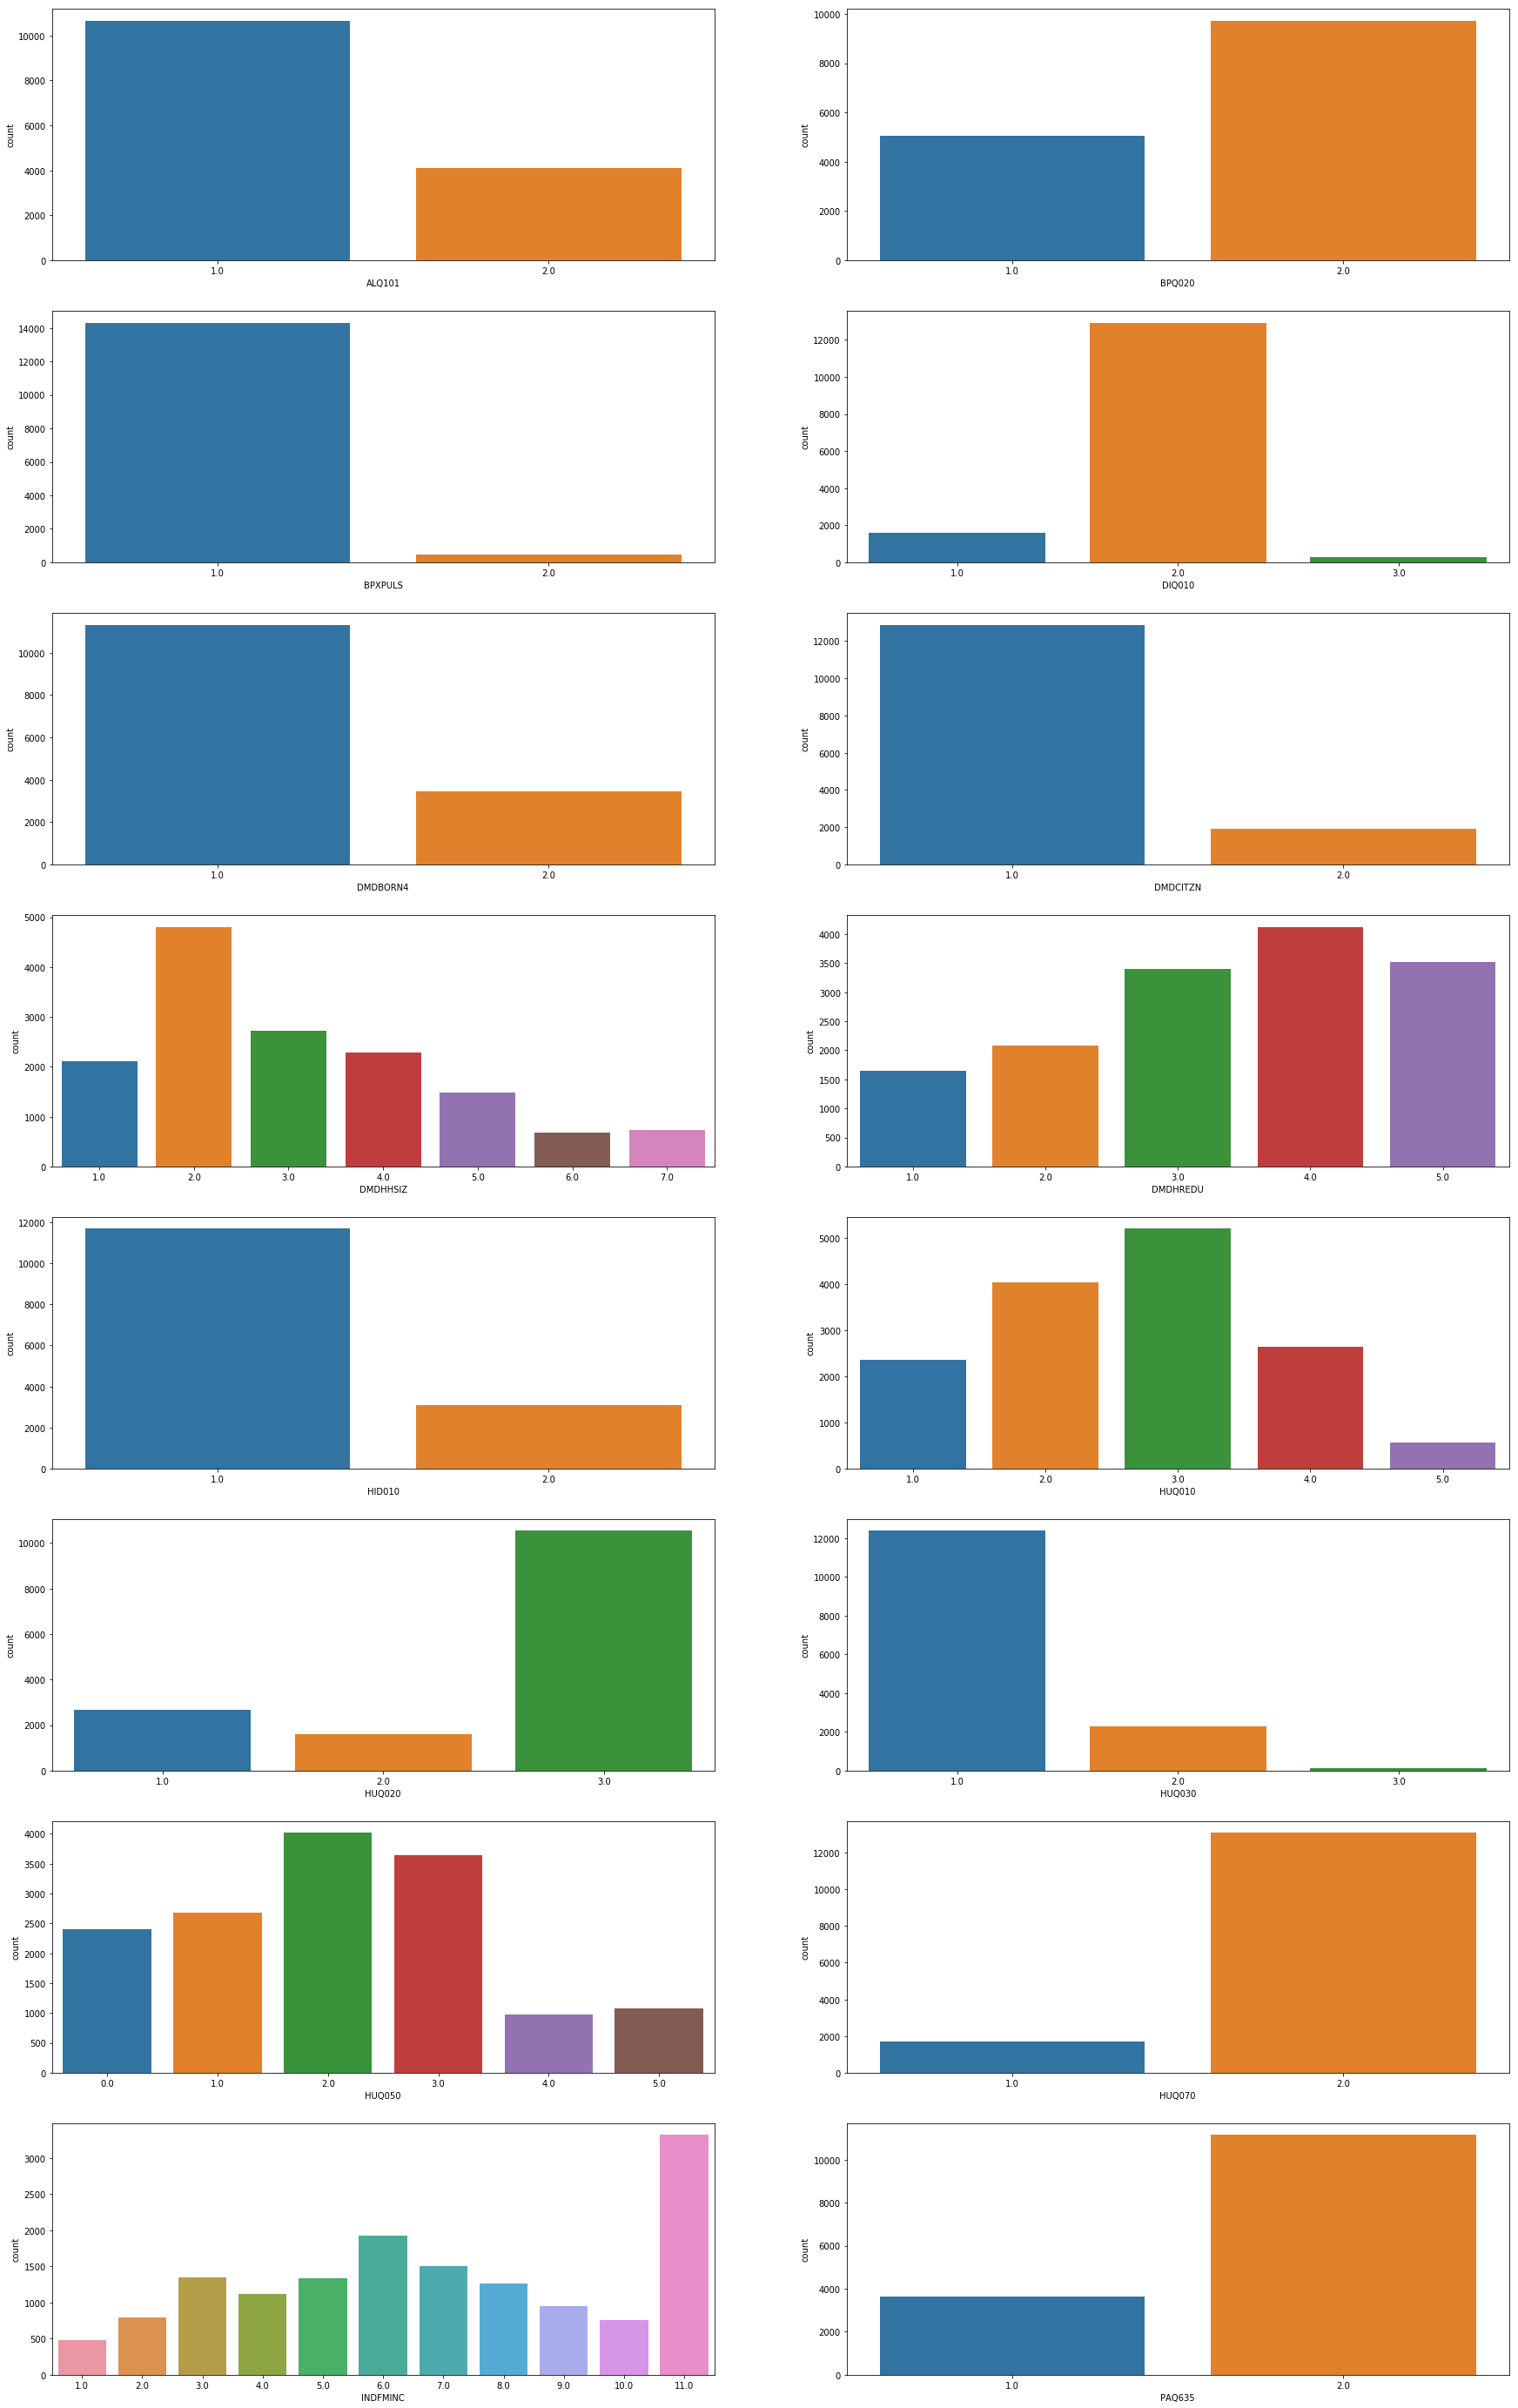

In [20]:
fig, ax = plt.subplots(8, 2, figsize=(30,50))
ax = ax.flatten()
for a, catplot in zip(ax, list(df_cat.columns)):
    sns.countplot(x=catplot, data=df_cat, ax=a)
plt.show()

### Numerical Features

In [21]:
#Get Numerical Features Only
df_num = df_no.copy()
df_num = df_num.select_dtypes(include=['float64'])
df_num = df_num.drop(['_id','MEC18YR','DRX18YR'], axis=1)

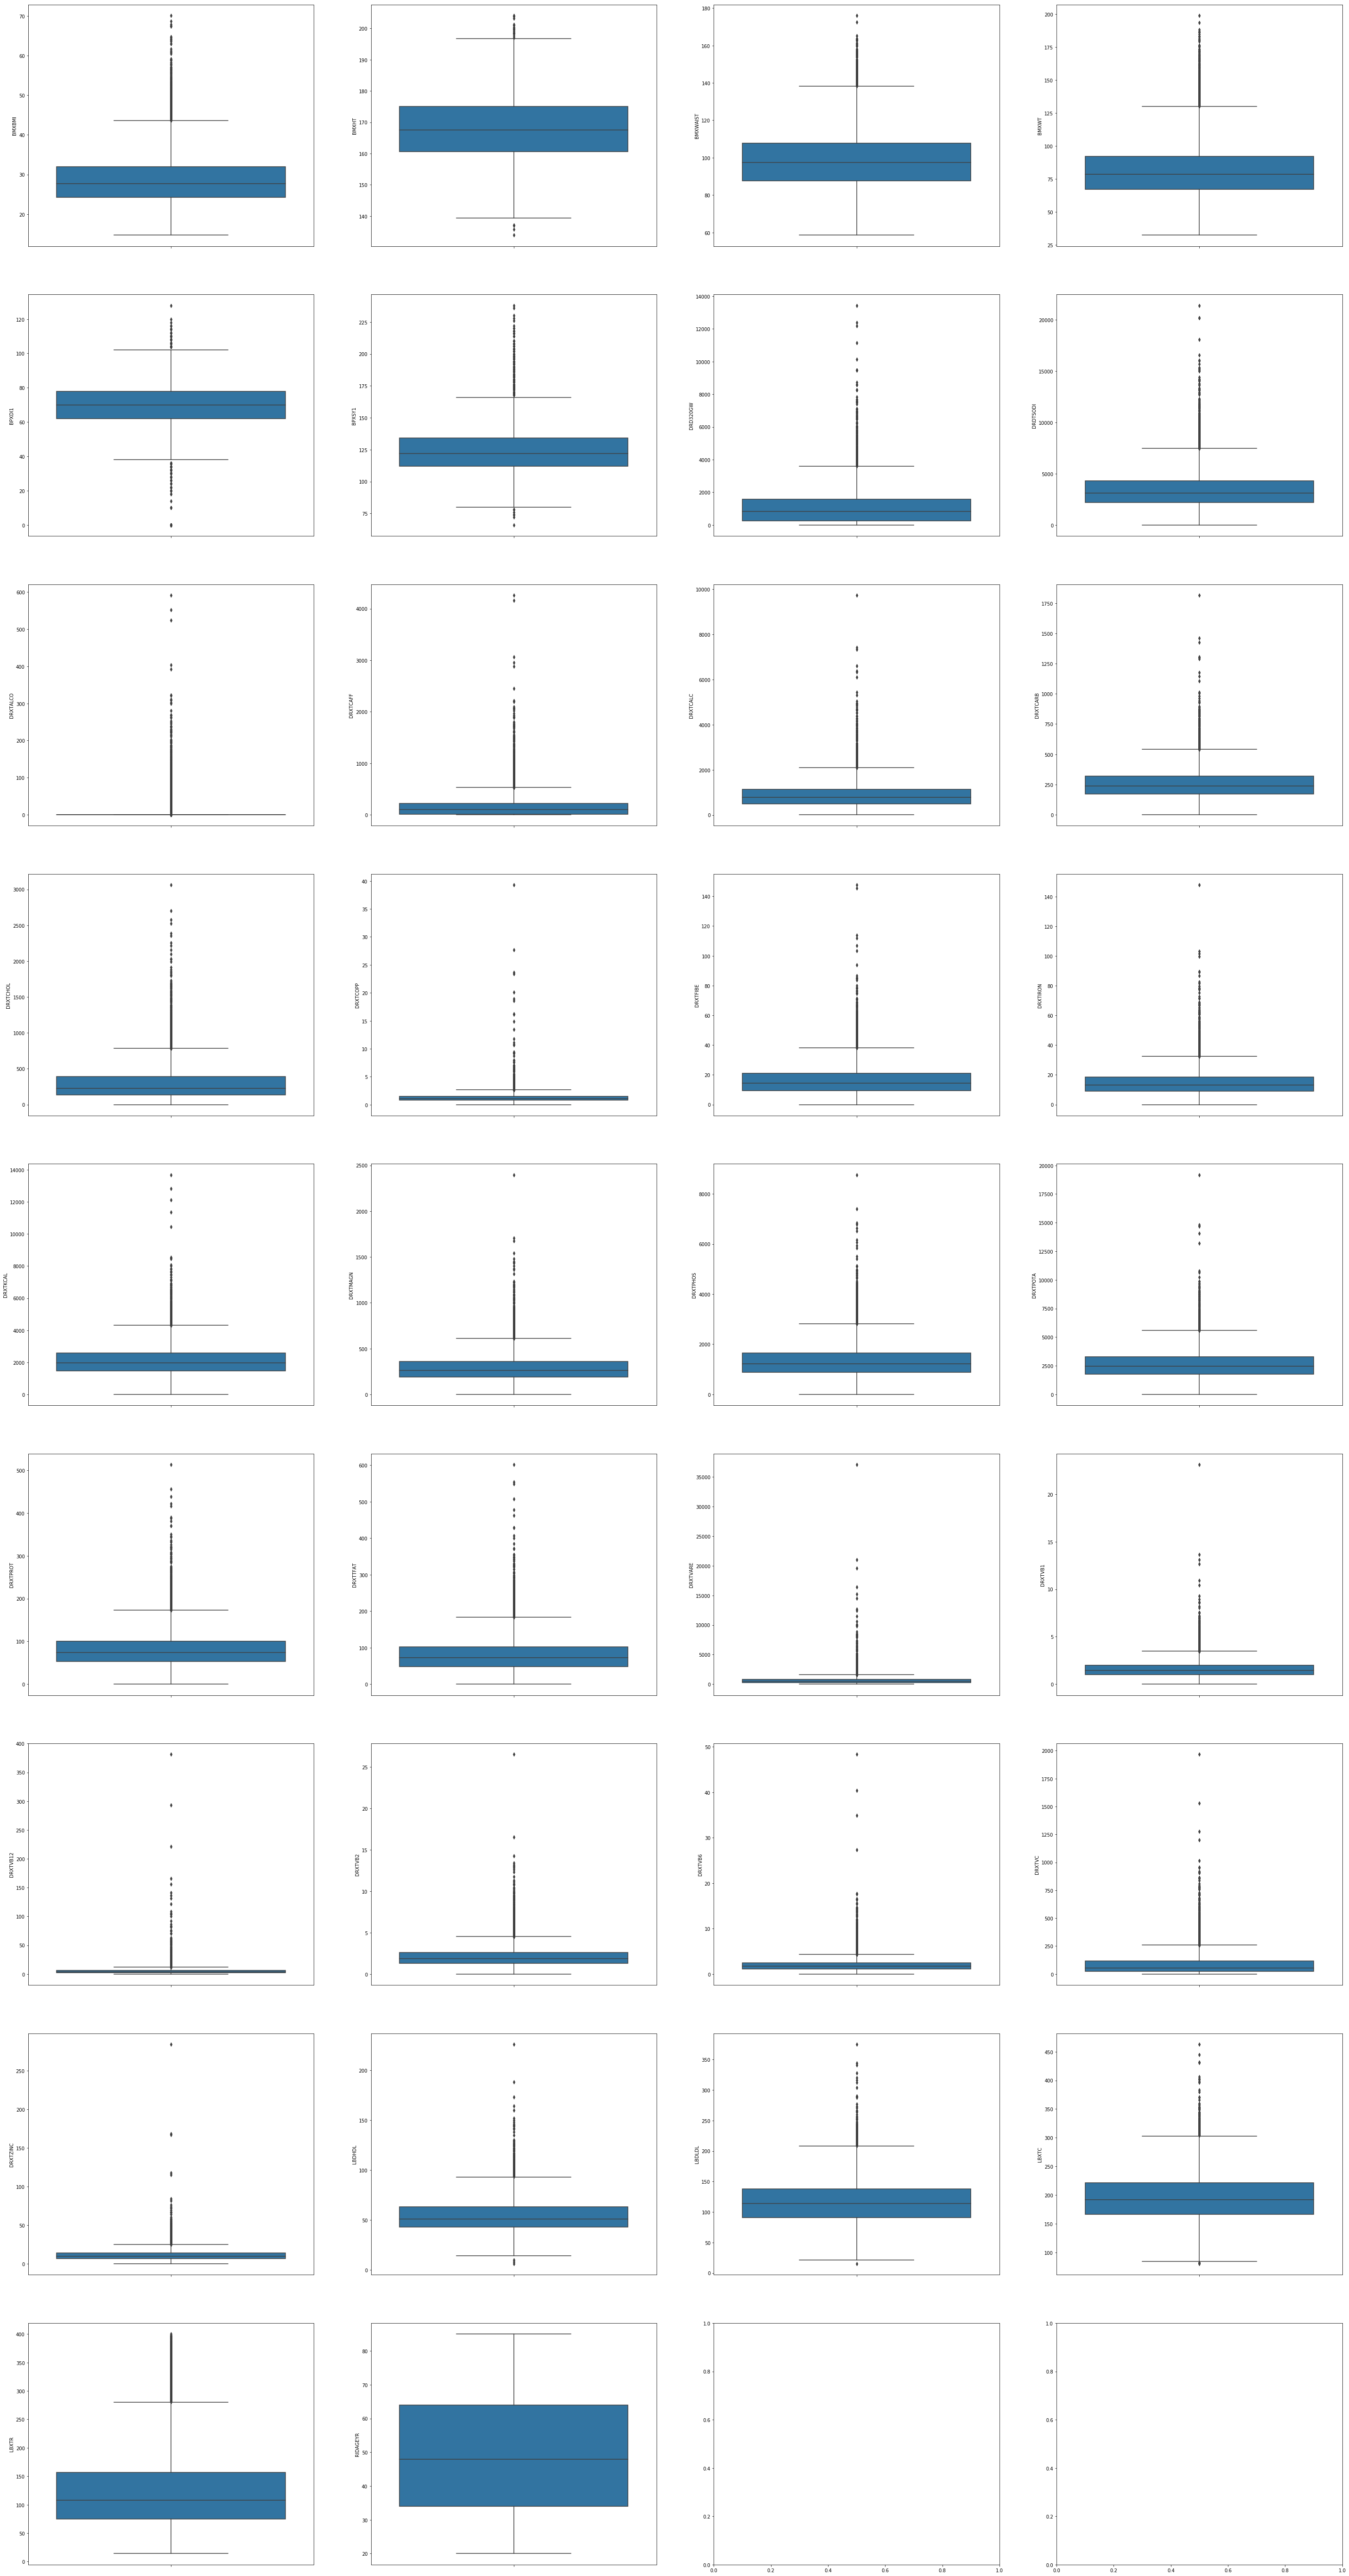

In [22]:
fig, ax = plt.subplots(9, 4, figsize=(50,100))
ax = ax.flatten()
for a, bp in zip(ax, list(df_num.columns)):
    sns.boxplot(y=bp, data=df_num, ax=a)
plt.show()

### Class Distribution

In [23]:
label_count = df_no.groupby(label, as_index = False).count()

In [24]:
#Count of class labels
class_names = list(label_count[label]) #Count the different labels
count = list(label_count['_id']) #Sum of different labels
count

[14173, 611]

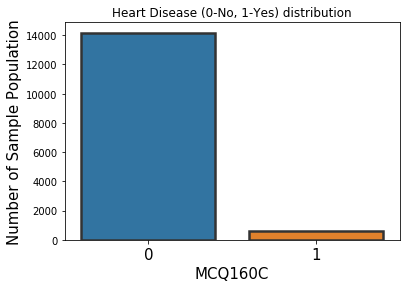

In [25]:
#Bar Plot of Class Labels
index = np.arange(len(class_names))
sns.barplot(x=class_names, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel(label, fontsize=15)
plt.ylabel('Number of Sample Population', fontsize=15)
plt.xticks(index, class_names, fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

In [26]:
#Find balance of labels
sum(df_no[label]==1)/(len(df_no[label]))
#0.9587 in majority class - No Heart Disease
#0.0413 in minority class - Heart Disease

0.0413284632034632

## Class distribution as percentage of years

In [27]:
label_perc = df_no.groupby(['Year',label], as_index = False).count()

In [28]:
lp = label_perc[['Year', '_id',label]].copy()

In [29]:
perc = lp.groupby(['Year', '_id']).agg({'_id': 'sum'})
perc = perc.rename(columns={ perc.columns[0]: "pcts" })
perc = perc.sort_values(by=['Year','pcts'], ascending=[True, False])
# Change: groupby Year and divide by sum
label_pcts = perc.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [30]:
#Get percentage values
lp['Percentages'] = label_pcts.values

In [31]:
lp.head()

,Year,_id,MCQ160C,Percentages
0,0,1216,0,0.970471
1,0,37,1,0.029529
2,1,1500,0,0.959079
3,1,64,1,0.040921
4,2,1340,0,0.947666


In [32]:
year_names = list(lp['Year'])
class_names = list(lp[label])

In [33]:
perc = list(lp['Percentages'])

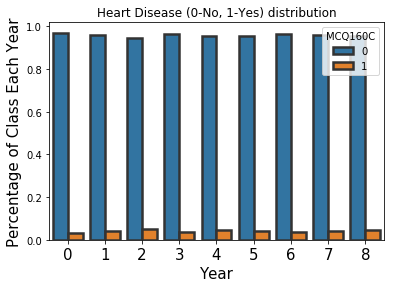

In [34]:
sns.barplot(x='Year', y='Percentages', data=lp, hue=label, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentage of Class Each Year', fontsize=15)
plt.xticks(fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

## Correlation of Numerical Features

### Pearson's Coefficient

#### Correlation of Numerical features

In [35]:
df_no.shape

(14784, 62)

In [36]:
#get Correlations of each features in dataset
x = ['_id', 'Year', 'MEC18YR', 'DRX18YR']

corrmat = df_no[df_no.columns.difference(x)].corr()
top_corr_features = corrmat.index

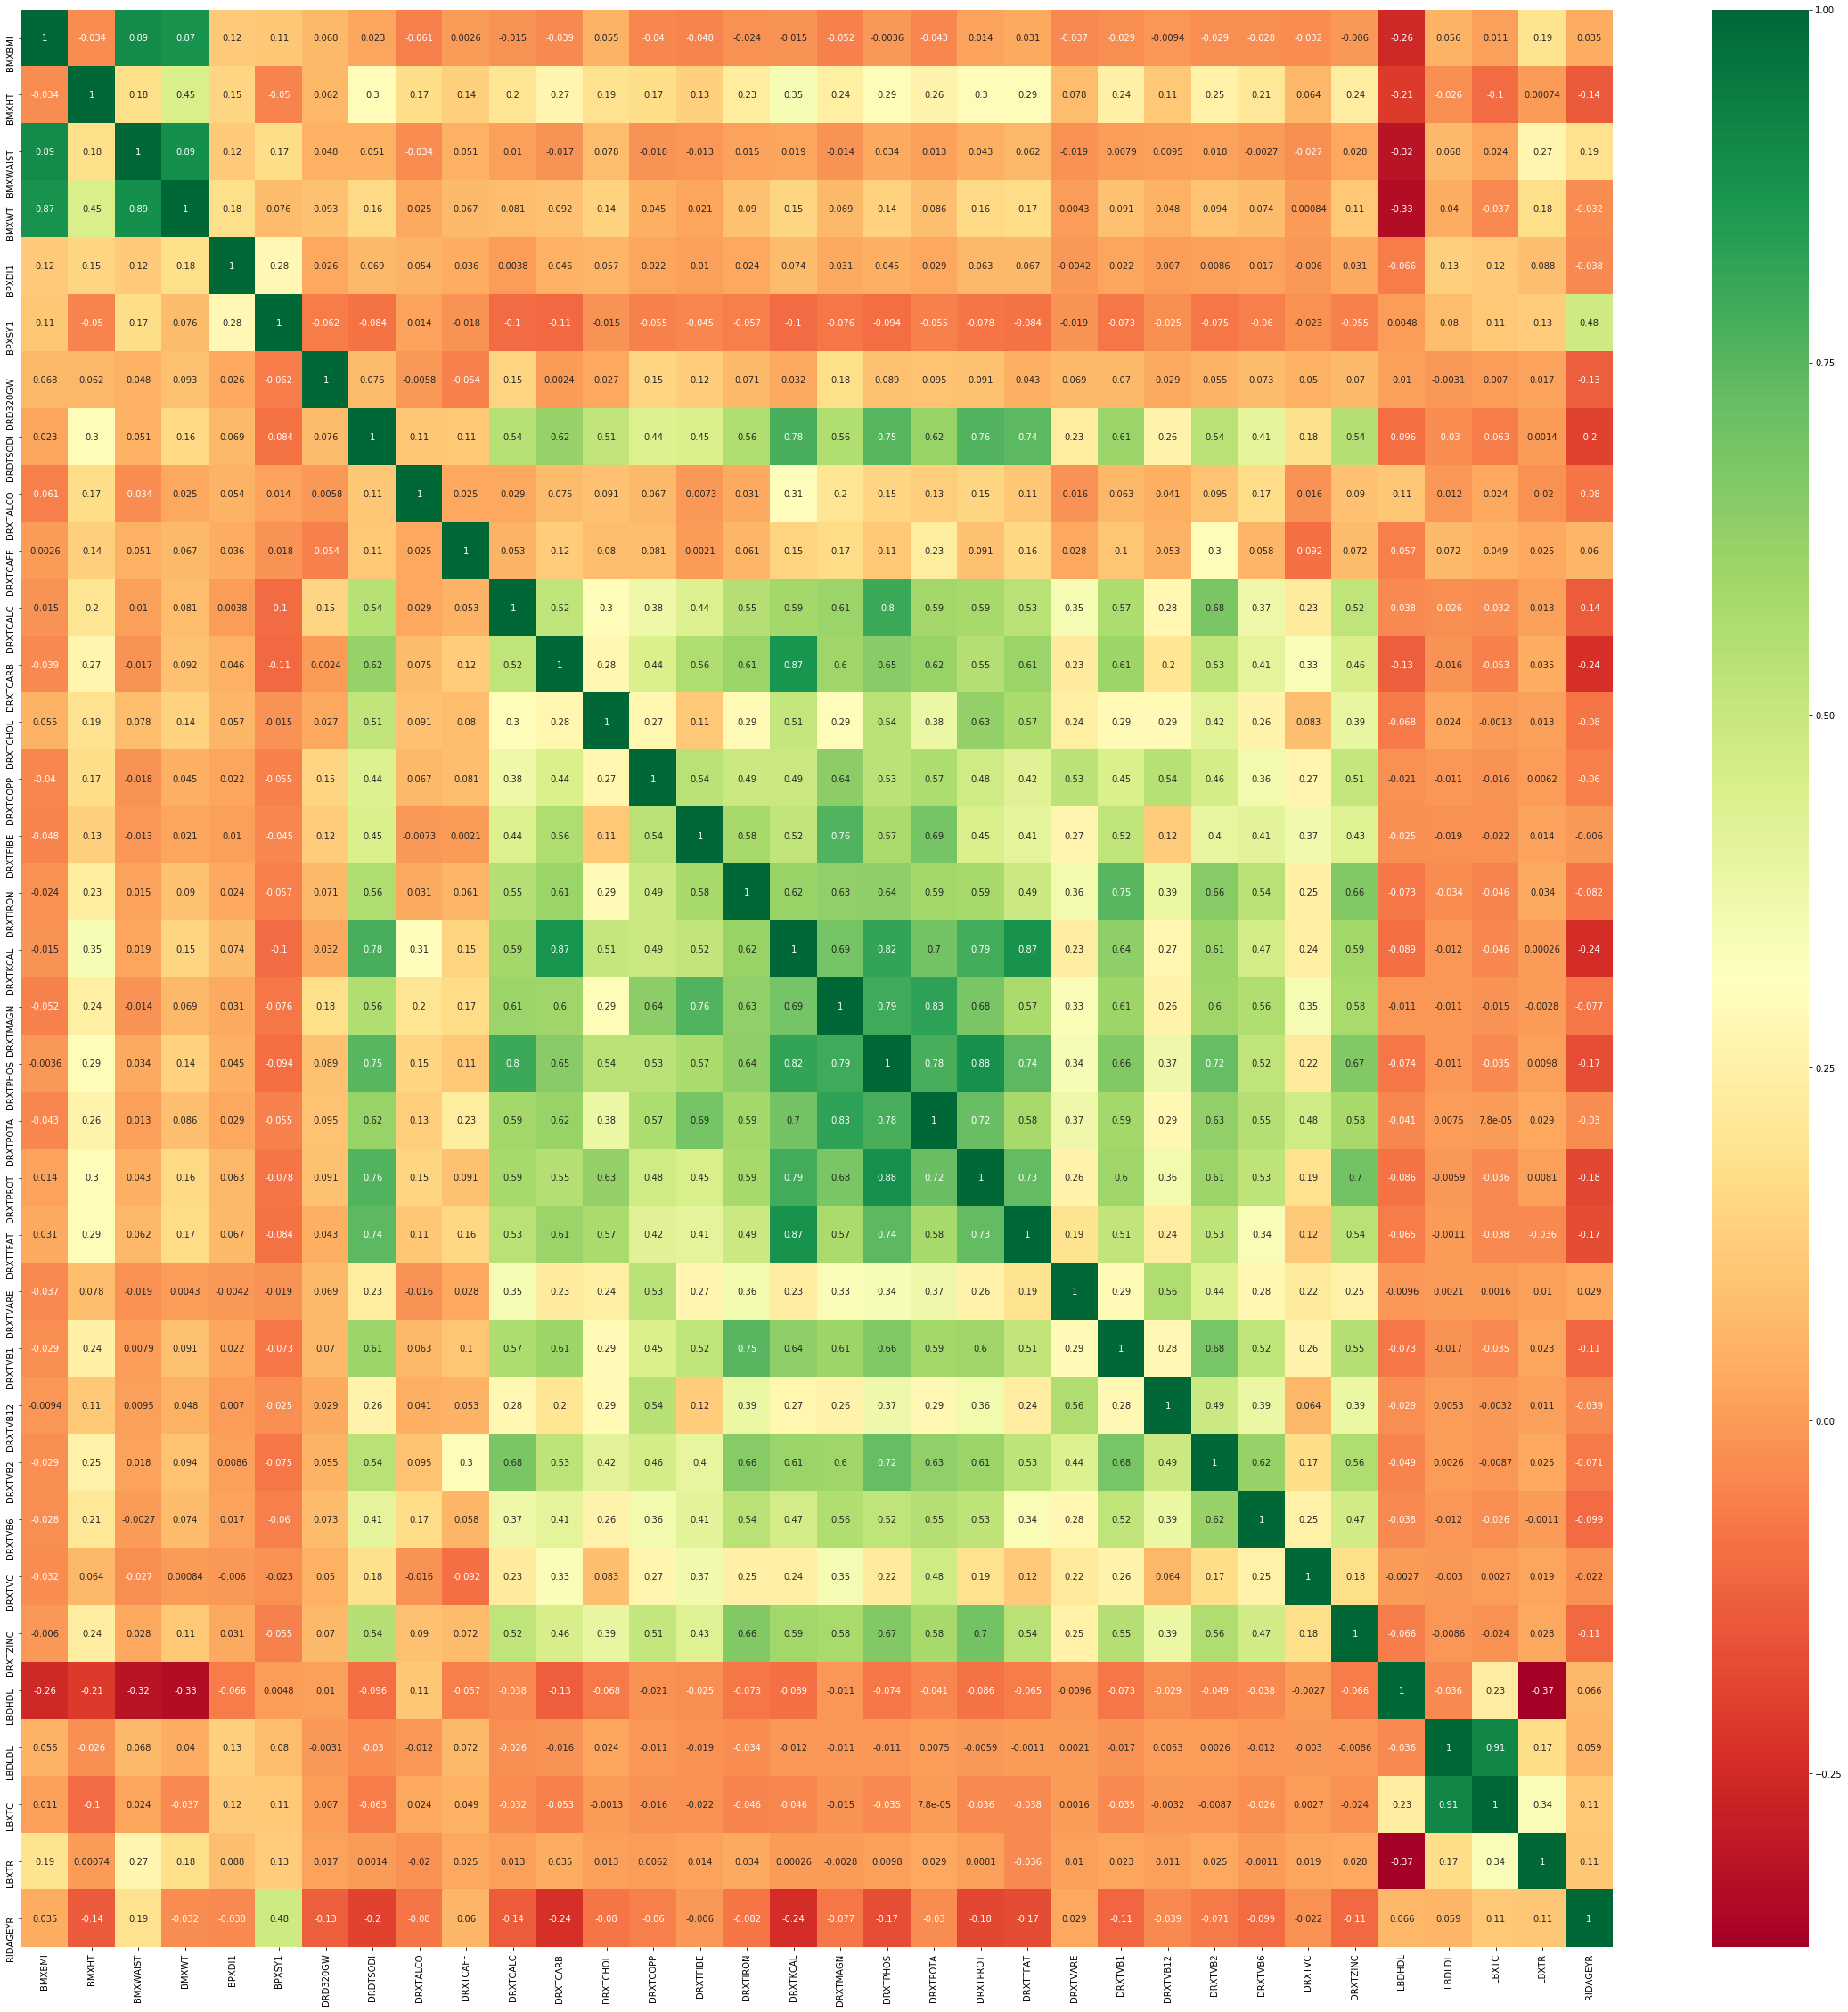

In [37]:
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
#cor_target = abs(corrmat[label])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features

# Create X and y

In [39]:
#Drop variables
#Create X - drop id, label, and sample weight
X = df.drop(['_id', label], axis=1)

#Maintain id of X's
X_idx = df[['_id']]

#Create y - label
y = df[[label]]

#Create column to stratify based on year
year = df[['Year']]

In [40]:
X.shape

(14784, 65)

# Split Train, Test

In [41]:
#Train, test, split
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
#Stratify Train, Test based on Year Value
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=year)

In [43]:
#y_true is test label
y_true = y_test[label]

In [44]:
df['Year'].value_counts()

5    1988
4    1937
7    1797
8    1629
6    1621
3    1581
1    1564
2    1414
0    1253
Name: Year, dtype: int64

## Check if Stratified Sampling Worked

In [45]:
#See if years are split evenly in training and test
xt = X_train['Year'].value_counts()
xte = X_test['Year'].value_counts()

In [46]:
#Test is 20% of Training for each year
xte/(xte+xt)

5    0.200201
4    0.199793
7    0.199777
8    0.200123
6    0.199877
3    0.199873
1    0.200128
2    0.200141
0    0.200319
Name: Year, dtype: float64

In [47]:
#Test set label distribution
yt = y_true.value_counts()
yt

0    2851
1     106
Name: MCQ160C, dtype: int64

In [48]:
yt[0]/(yt[0]+yt[1])

0.9641528576259722

In [49]:
#Train set label distribution
ytr = y_train[label].value_counts()
ytr

0    11322
1      505
Name: MCQ160C, dtype: int64

In [50]:
ytr[0]/(ytr[0]+ytr[1])

0.9573010907246132

# Resample: Upsample and Downsample (Not Used)

We have imbalanced data, so we want to do upsampling and downsampling to see if it will improve the model

In [51]:
from sklearn.utils import resample

In [52]:
#Resample training data function
def resample_train(X_train, y_train, sample_type, label):
    #Concatenate our training data back together
    X_r = pd.concat([X_train, y_train], axis=1)
    
    #Separate minority and majority classes
    minority = X_r[X_r[label]==1]
    majority = X_r[X_r[label]==0]
    
    if (sample_type=='up'):
        #Upsample minority class
        resampled = resample(minority,
                           replace=True, #Sample with replacement
                           n_samples=len(majority), #Match number in majority class
                           random_state=0) #Reproducible results
        notsampled=majority
    
    if (sample_type=='down'):
        #Downsample majority class
        resampled = resample(majority,
                           replace=False, #Sample without replacement
                           n_samples=len(minority), #Match minority n
                           random_state=0) #Reproducible results
        notsampled=minority
    
    #Combine upsample or downsample of majority and minority
    sampled = pd.concat([resampled, notsampled])
    y_train = sampled[[label]]
    X_train = sampled.drop([label], axis=1)
    return X_train, y_train    

#### Sklearn Upsampled

In [53]:
X_train_u, y_train_u = resample_train(X_train, y_train, 'up', label)

In [54]:
y_train_u[y_train_u[label]==1].shape

(11322, 1)

In [55]:
y_train_u[y_train_u[label]==0].shape

(11322, 1)

#### Sklearn Downsampled

In [56]:
X_train_d, y_train_d = resample_train(X_train, y_train, 'down', label)

In [57]:
y_train_d[y_train_d[label]==1].shape

(505, 1)

In [58]:
y_train_d[y_train_d[label]==0].shape

(505, 1)

# Imbalance Learn - SMOTE (Up) and TomekLinks (Down)

### Upsampling - SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE(random_state=1)

In [61]:
X_sm, y_sm = sm.fit_sample(X_train, y_train.values.ravel())

In [62]:
#Before upsampling - Majority
len(y_train[y_train[label]==0])

11322

In [63]:
#Before upsampling - Minority
len(y_train[y_train[label]==1])

505

In [64]:
#After upsampling, majority and minority match
sum(y_sm==0)

11322

In [65]:
sum(y_sm==1)

11322

### Downsampling - Tomeklinks

In [66]:
from imblearn.under_sampling import TomekLinks

In [67]:
tLinks = TomekLinks(random_state = 0, return_indices = True)

In [68]:
X_tl, y_tl, id_tl = tLinks.fit_sample(X_train, y_train.values.ravel())

In [69]:
#Before downsampling - Majority
len(y_train[y_train[label]==0])

11322

In [70]:
#Before downsampling - Minority
len(y_train[y_train[label]==1])

505

In [71]:
#After downsampling, majority decreases in neighbors
sum(y_tl==0)

11125

In [72]:
sum(y_tl==1)

505

# Clean Columns for Training Data

## Regular Training and Test

In [73]:
X_cols = list(X_train.columns)

#Get MEC18YR from training & test data
Xtr_sw = X_train[['MEC18YR']]
Xts_sw = X_test[['MEC18YR']]

#Get DRX18YR from training & test data
Xtr_dsw = X_train[['DRX18YR']]
Xts_dsw = X_test[['DRX18YR']]

#Get Year from training & test data
Xtr_yr = X_train[['Year']]
Xts_yr = X_test[['Year']]

#Drop columns for training
X_train = X_train.drop(['MEC18YR','DRX18YR','Year'], axis=1)
X_test = X_test.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## SMOTE

In [74]:
X_sm = pd.DataFrame(X_sm, columns = X_cols)

In [75]:
X_sm.head()

,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DIQ010_2_0,DIQ010_3_0,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR
0,1.0,24.63,154.1,86.0,58.5,1.0,56.0,0.0,110.0,1.0,0.0,1.0,1.0,3.0,4.0,7.637400e+02,3533.0,5.397605e-79,6.800000e+01,908.0,247.87,609.0,1.433,22.0,27.02,2036.0,327.0,1372.0,2733.0,67.37,94.35,731.0,2.335,9.54,3.318,2.938,115.6,12.64,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,84.0,120.0,221.0,87.0,1.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,472.531660,243.505512
1,1.0,30.00,159.7,106.4,76.5,1.0,64.0,0.0,106.0,1.0,0.0,1.0,1.0,6.0,2.0,1.170000e+03,2217.0,5.397605e-79,5.397605e-79,569.0,330.78,71.0,1.573,32.5,14.44,1774.0,367.0,795.0,3913.0,51.59,31.73,453.0,1.552,0.18,0.992,2.002,302.0,7.56,1.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,6.0,67.0,75.0,160.0,89.0,1.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,5223.837954,10697.493475
2,0.0,27.36,168.2,96.6,77.4,0.0,78.0,0.0,128.0,1.0,0.0,0.0,0.0,4.0,3.0,5.397605e-79,5950.0,5.397605e-79,8.900000e+01,799.0,401.99,443.0,1.158,16.9,15.07,3011.0,358.0,1719.0,5012.0,123.54,104.20,445.0,1.549,3.16,2.111,3.010,499.3,12.63,0.0,4.0,0.0,1.0,0.0,0.0,5.0,1.0,6.0,47.0,79.0,145.0,93.0,1.0,1.0,0.0,0.0,48.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,3007.548228,5387.887753
3,0.0,29.12,167.3,98.8,81.5,1.0,80.0,0.0,124.0,1.0,0.0,0.0,0.0,3.0,3.0,1.622500e+03,5492.0,1.980000e+01,1.600000e+02,790.0,308.80,215.0,1.821,30.7,27.64,2905.0,420.0,2273.0,4159.0,103.10,132.86,2354.0,2.037,2.77,2.767,2.341,90.3,15.17,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,11.0,52.0,216.0,285.0,84.0,0.0,0.0,0.0,0.0,53.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,6715.603060,5719.651996
4,0.0,28.38,176.7,104.8,88.6,1.0,78.0,0.0,122.0,1.0,0.0,1.0,1.0,7.0,2.0,1.420800e+03,5041.0,5.397605e-79,2.000000e+00,1201.0,352.73,235.0,1.605,17.5,16.61,2845.0,333.0,1614.0,3990.0,102.63,115.45,437.0,1.604,6.65,2.267,2.182,80.6,17.13,0.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,44.0,122.0,193.0,133.0,0.0,1.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2361.189520,1018.186458


In [76]:
#Get MEC18YR from training
Xsm_sw = X_sm[['MEC18YR']]

#Get DRX18YR from training
Xsm_dsw = X_sm[['DRX18YR']]

#Get Year from training
Xsm_yr = X_sm[['Year']]

#Drop columns for training
X_sm = X_sm.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## TomekLinks

In [77]:
X_tl = pd.DataFrame(X_tl, columns = X_cols)

In [78]:
#Get MEC18YR from training
Xtl_sw = X_tl[['MEC18YR']]

#Get DRX18YR from training
Xtl_dsw = X_tl[['DRX18YR']]

#Get Year from training
Xtl_yr = X_tl[['Year']]

#Drop sample weight
X_tl = X_tl.drop(['MEC18YR','DRX18YR','Year'], axis=1)

# Feature Selection

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Drop MEC sample weight for X for feature selection

In [80]:
Xd = df_no.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df_no[label]

### Feature Selection

In [81]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
24  DRXTKCAL  18393.128558
15  DRDTSODI  18129.673796
14  DRD320GW   7229.300245
26  DRXTPHOS   4817.918001
52  RIDAGEYR   4764.357557
18  DRXTCALC   4104.748881
19  DRXTCARB   2485.882979
45    LBDLDL   1801.150440
47     LBXTR   1357.605734
30  DRXTVARE   1269.629491


### OHE Feature Selection

In [82]:
Xd = df.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df[label]

In [83]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
25  DRXTKCAL  18393.128558
16  DRDTSODI  18129.673796
15  DRD320GW   7229.300245
27  DRXTPHOS   4817.918001
55  RIDAGEYR   4764.357557
19  DRXTCALC   4104.748881
20  DRXTCARB   2485.882979
48    LBDLDL   1801.150440
50     LBXTR   1357.605734
31  DRXTVARE   1269.629491


# Data Analysis: Random Forest and XGBoost

### Import Machine Learning Libraries

In [84]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

#Grid Search
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# Random Forest

## GridSearch: Define parameters and run

### Regular Training

In [85]:
#clf = RandomForestClassifier(random_state=1)

#Define Parameter Grid for GridSearchCV
# param_grid = {
#     'n_estimators' : [100, 300],
#     'max_features' : ['auto'],
#     'max_depth' : [4, 6, 8, 15],
#     'criterion' : ['gini'],
#     'class_weight' : [{0:0.1, 1:0.9},'balanced']
# }

In [86]:
#cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [87]:
#cv_rfc.fit(X_train, y_train.values.ravel())

In [88]:
#cv_rfc.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 300}

In [89]:
#cv_rfc.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=8, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [90]:
#cv_rfc.best_score_
#0.3120732202571576

### Upsampling: SMOTE

In [91]:
#clf_u = RandomForestClassifier(random_state=1)

In [92]:
#cv_rfc_u = GridSearchCV(estimator=clf_u, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [93]:
#cv_rfc_u.fit(X_sm, y_sm)

In [94]:
#cv_rfc_u.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 15,
#  'max_features': 'auto',
#  'n_estimators': 300}

In [95]:
#cv_rfc_u.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=15, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [96]:
#cv_rfc_u.best_score_
#0.9739237833224845

### Downsampling: TomekLinks

In [97]:
#clf_d = RandomForestClassifier(random_state=1)

In [98]:
#cv_rfc_d = GridSearchCV(estimator= clf_d, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [99]:
#cv_rfc_d.fit(X_tl, y_tl)

In [100]:
#cv_rfc_d.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 100}

In [101]:
#cv_rfc_d.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=8, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=100, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [102]:
#cv_rfc_d.best_score_
#0.30942644457675755

## Define Classifier with Best Parameters and Fit

### Regular Training

In [103]:
clf_r = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [104]:
clf_r.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Upsampling: SMOTE

In [105]:
clf_s = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
clf_s.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Downsampling: TomekLinks

In [107]:
clf_t = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
clf_t.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Feature Importance from Random Forest

### Regular Training

In [109]:
rf_output = pd.DataFrame(clf_r.feature_importances_) #Get importance of features in order
rf_output['Label'] = X_train.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [110]:
rf_oo_r = rf_output.nlargest(10, 'Feature_Importance')

In [111]:
rf_oo_r_s = rf_oo_r.sort_values(by=['Feature_Importance'])

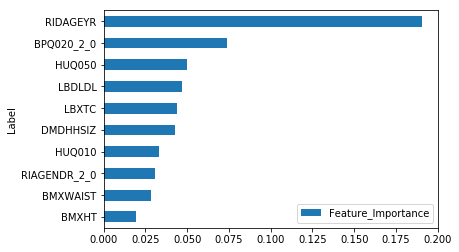

In [112]:
ax_r = rf_oo_r_s.plot.barh(y='Feature_Importance', x='Label')

### Upsampling: SMOTE

In [113]:
rf_output = pd.DataFrame(clf_s.feature_importances_)
rf_output['Label'] = X_sm.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [114]:
rf_oo_u = rf_output.nlargest(10, 'Feature_Importance')

In [115]:
rf_oo_u_s = rf_oo_u.sort_values(by=['Feature_Importance'])

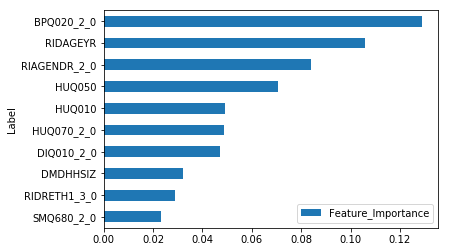

In [116]:
ax_u = rf_oo_u_s.plot.barh(y='Feature_Importance', x='Label')

### Downsampling: TomekLinks

In [117]:
rf_output = pd.DataFrame(clf_t.feature_importances_)
rf_output['Label'] = X_tl.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [118]:
rf_oo_d = rf_output.nlargest(10, 'Feature_Importance')

In [119]:
rf_oo_d_s = rf_oo_d.sort_values(by=['Feature_Importance'])

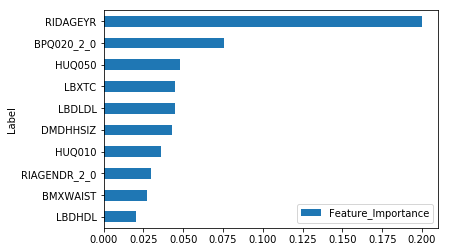

In [120]:
ax_d = rf_oo_d_s.plot.barh(y='Feature_Importance', x='Label')

# Model Evaluation

## Confusion Matrix & Classification Reports

### Regular Training

In [121]:
pred_r = clf_r.predict(X_test)

In [122]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_r, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2599,252,2851
1,43,63,106
All,2642,315,2957


In [123]:
r_output = '{} \n Accuracy: {}'
r = r_output.format(classification_report(y_true, pred_r, labels=[0,1]), accuracy_score(y_true, pred_r))
print(r)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2851
           1       0.20      0.59      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.75      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.900236726411904


### Upsampling: SMOTE

In [124]:
pred_s = clf_s.predict(X_test)

In [125]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_s, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2799,52,2851
1,91,15,106
All,2890,67,2957


In [126]:
u_output = '{} \n Accuracy: {}'
u = u_output.format(classification_report(y_true, pred_s, labels=[0,1]), accuracy_score(y_true, pred_s))
print(u)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2851
           1       0.22      0.14      0.17       106

   micro avg       0.95      0.95      0.95      2957
   macro avg       0.60      0.56      0.57      2957
weighted avg       0.94      0.95      0.95      2957
 
 Accuracy: 0.951640175853906


### Downsampling: TomekLinks

In [127]:
pred_t = clf_t.predict(X_test)

In [128]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_t, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2587,264,2851
1,41,65,106
All,2628,329,2957


In [129]:
d_output = '{} \n Accuracy: {}'
d = d_output.format(classification_report(y_true, pred_t, labels=[0,1]), accuracy_score(y_true, pred_t))
print(d)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2851
           1       0.20      0.61      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.76      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.8968549205275618


## ROC AUC Score

### Regular Training

In [130]:
prob_y_2_r = clf_r.predict_proba(X_test)
prob_y_2_r = [p[1] for p in prob_y_2_r]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_r))

ROC AUC Score:  0.8897837898651912


### Upsampling:  SMOTE

In [131]:
prob_y_2_s = clf_s.predict_proba(X_test)
prob_y_2_s = [p[1] for p in prob_y_2_s]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_s))

ROC AUC Score:  0.8994526912106312


### Downsampling: TomekLinks

In [132]:
prob_y_2_t = clf_t.predict_proba(X_test)
prob_y_2_t = [p[1] for p in prob_y_2_t]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_t))

ROC AUC Score:  0.8876825741381706


## Adjust Predictions Based on Probability Threshold

In [133]:
#Import Metrics
from sklearn.metrics import recall_score, precision_score

In [134]:
#Custom cutoff probability
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

#Custom scoring function
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff

### Regular Training

In [135]:
# scores_r = []
cutoffs_r = np.arange(0.3, 0.6, 0.05)

# for cutoff in cutoffs_r:
#     validated = cross_val_score(clf_r, X_train, y_train.values.ravel(), cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_r.append(validated)

In [136]:
#scores_r output
# [array([0.24862888, 0.24662466, 0.23603604]),
#  array([0.28073993, 0.26797386, 0.25410734]),
#  array([0.2962963 , 0.27821522, 0.27150538]),
#  array([0.30220713, 0.304     , 0.29948365]),
#  array([0.32586558, 0.31013917, 0.30021142]),
#  array([0.34586466, 0.30243902, 0.28723404])]

In [137]:
scores_r_saved = [[0.24862888, 0.24662466, 0.23603604],
                  [0.28073993, 0.26797386, 0.25410734],
                 [0.2962963 , 0.27821522, 0.27150538],
                 [0.30220713, 0.304     , 0.29948365],
                 [0.32586558, 0.31013917, 0.30021142],
                 [0.34586466, 0.30243902, 0.28723404]]

In [138]:
#Melt and make scores into dataframe
scores_rdf = pd.DataFrame(scores_r_saved.copy())
#Rename columns
scores_rdf['Cutoff'] = pd.DataFrame(cutoffs_r).round(2)
#Create cutoff column values
scores_rdf = pd.melt(scores_rdf, id_vars='Cutoff')
scores_rdf.columns = ['Cutoff', 'CV', 'F Score'] 

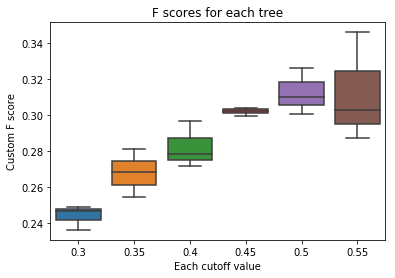

In [139]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_rdf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

Looks like the optimal cutoff is 0.5

In [140]:
cutoff_r = 0.5

### Upsampling: SMOTE

In [141]:
# scores_u = []
cutoffs_u = np.arange(0.35, 0.65, 0.05)

# for cutoff in cutoffs_u:
#     validated = cross_val_score(clf_s, X_sm, y_sm, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_u.append(validated)

In [142]:
#scores_u output
# [array([0.95493562, 0.96608217, 0.97080386]),
#  array([0.9530383 , 0.97431264, 0.98013245]),
#  array([0.94859174, 0.98025974, 0.98705375]),
#  array([0.94415261, 0.98550725, 0.99211149]),
#  array([0.93979933, 0.98964206, 0.99419831]),
#  array([0.93483146, 0.99210111, 0.99564011]),
#  array([0.92964114, 0.9929959 , 0.995228  ])]

In [143]:
scores_u_saved = [[0.95493562, 0.96608217, 0.97080386],
 [0.9530383 , 0.97431264, 0.98013245],
 [0.94859174, 0.98025974, 0.98705375],
 [0.94415261, 0.98550725, 0.99211149],
 [0.93979933, 0.98964206, 0.99419831],
 [0.93483146, 0.99210111, 0.99564011],
 [0.92964114, 0.9929959 , 0.995228  ]]

In [144]:
#Melt and make scores into dataframe
scores_udf = pd.DataFrame(scores_u_saved.copy())
#Rename columns
scores_udf['Cutoff'] = pd.DataFrame(cutoffs_u).round(2)
#Create cutoff column values
scores_udf = pd.melt(scores_udf, id_vars='Cutoff')
scores_udf.columns = ['Cutoff', 'CV', 'F Score'] 

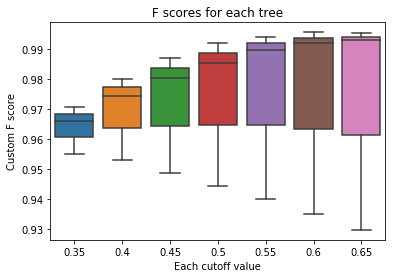

In [145]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_udf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [146]:
scores_udf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.35,0.963941
0.40,0.969161
0.45,0.971968
0.50,0.973924
0.55,0.974547
0.60,0.974191
0.65,0.972622


Looks like the optimal cutoff is 0.55

In [147]:
cutoff_u = 0.55

### Downsampling: TomekLinks

In [148]:
# scores_d = []
cutoffs_d = np.arange(0.1, 0.65, 0.05)

# for cutoff in cutoffs_d:
#     validated = cross_val_score(clf_t, X_tl, y_tl, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_d.append(validated)

In [149]:
# scores_d output
# [array([0.14099217, 0.14902317, 0.14503133]),
#  array([0.16613419, 0.17401004, 0.17948718]),
#  array([0.19465649, 0.2023968 , 0.20813876]),
#  array([0.21526718, 0.22170901, 0.22948207]),
#  array([0.25276753, 0.2460177 , 0.25426945]),
#  array([0.28765572, 0.27357513, 0.272203  ]),
#  array([0.30152144, 0.28074534, 0.2752809 ]),
#  array([0.31292517, 0.31137725, 0.29484902]),
#  array([0.31818182, 0.3125    , 0.297593  ]),
#  array([0.32663317, 0.3018018 , 0.28333333]),
#  array([0.3054755 , 0.29213483, 0.25174825])]

In [150]:
scores_d_saved = [[0.14099217, 0.14902317, 0.14503133],
 [0.16613419, 0.17401004, 0.17948718],
 [0.19465649, 0.2023968 , 0.20813876],
 [0.21526718, 0.22170901, 0.22948207],
 [0.25276753, 0.2460177 , 0.25426945],
 [0.28765572, 0.27357513, 0.272203  ],
 [0.30152144, 0.28074534, 0.2752809 ],
 [0.31292517, 0.31137725, 0.29484902],
 [0.31818182, 0.3125    , 0.297593  ],
 [0.32663317, 0.3018018 , 0.28333333],
 [0.3054755 , 0.29213483, 0.25174825]]

In [151]:
#Melt and make scores into dataframe
scores_ddf = pd.DataFrame(scores_d_saved.copy())
#Rename columns
scores_ddf['Cutoff'] = pd.DataFrame(cutoffs_d).round(2)
#Create cutoff column values
scores_ddf = pd.melt(scores_ddf, id_vars='Cutoff')
scores_ddf.columns = ['Cutoff', 'CV', 'F Score'] 

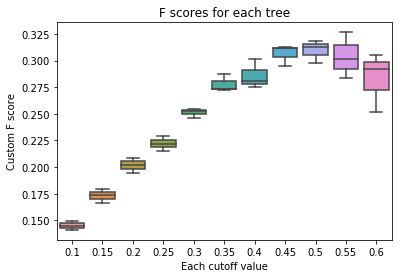

In [152]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_ddf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [153]:
scores_ddf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.10,0.145016
0.15,0.173210
0.20,0.201731
0.25,0.222153
0.30,0.251018
0.35,0.277811
0.40,0.285849
0.45,0.306384
0.50,0.309425


Looks like the optimal is 0.50

In [154]:
cutoff_d = 0.50

## Model Evaluation based on Optimal Probability Cutoff

### Regular Training

In [155]:
pred_rc = np.where(pd.DataFrame(prob_y_2_r)>cutoff_r, 1, 0).flatten()

In [156]:
cutoff_r

0.5

In [157]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2599,252,2851
1,43,63,106
All,2642,315,2957


In [158]:
rc_output = '{} \n Accuracy: {}'
rc = rc_output.format(classification_report(y_true, pred_rc, labels=[0,1]), accuracy_score(y_true, pred_rc))
print(rc)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2851
           1       0.20      0.59      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.75      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.900236726411904


In [159]:
#Compare with default cutoff 0.5
print(r)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2851
           1       0.20      0.59      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.75      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.900236726411904


### Upsampling: SMOTE 

In [160]:
pred_uc = np.where(pd.DataFrame(prob_y_2_s)>cutoff_u, 1, 0).flatten()

In [161]:
cutoff_u

0.55

In [162]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_uc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2818,33,2851
1,93,13,106
All,2911,46,2957


In [163]:
uc_output = '{} \n Accuracy: {}'
uc = uc_output.format(classification_report(y_true, pred_uc, labels=[0,1]), accuracy_score(y_true, pred_uc))
print(uc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2851
           1       0.28      0.12      0.17       106

   micro avg       0.96      0.96      0.96      2957
   macro avg       0.63      0.56      0.57      2957
weighted avg       0.94      0.96      0.95      2957
 
 Accuracy: 0.9573892458572878


In [164]:
#Compare with default cutoff 0.5
print(u)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2851
           1       0.22      0.14      0.17       106

   micro avg       0.95      0.95      0.95      2957
   macro avg       0.60      0.56      0.57      2957
weighted avg       0.94      0.95      0.95      2957
 
 Accuracy: 0.951640175853906


### Downsampling: TomekLinks

In [165]:
pred_dc = np.where(pd.DataFrame(prob_y_2_t)>cutoff_d, 1, 0).flatten()

In [166]:
cutoff_d

0.5

In [167]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2587,264,2851
1,41,65,106
All,2628,329,2957


In [168]:
dc_output = '{} \n Accuracy: {}'
dc = dc_output.format(classification_report(y_true, pred_dc, labels=[0,1]), accuracy_score(y_true, pred_dc))
print(dc)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2851
           1       0.20      0.61      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.76      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.8968549205275618


In [169]:
print(d)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2851
           1       0.20      0.61      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.76      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.8968549205275618


## XGBOOST

In [170]:
# A parameter grid for XGBoost
# params = {
#         'max_depth': [3, 4, 6],
#         'subsample': [1.0],
#         'colsample_bytree': [0.6, 1.0],
#         'scale_pos_weight': [10, 12, 15],
#         'learning_rate' : [0.1],
#         'n_estimators' : [100]
#         }

### Regular Training

#### GridSearch

In [171]:
#xg_class_r = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [172]:
#cv_xgr = GridSearchCV(estimator=xg_class_r, param_grid=params, scoring='f1', verbose=2, cv=3)

In [173]:
#cv_xgr.fit(X_train, y_train.values.ravel())

In [174]:
#cv_xgr.best_params_
# {'colsample_bytree': 0.6,
#  'learning_rate': 0.1,
#  'max_depth': 3,
#  'n_estimators': 100,
#  'scale_pos_weight': 10,
#  'subsample': 1.0}

In [175]:
#cv_xgr.best_score_
#0.31918429936811754

#### Best Parameter

In [176]:
#cv_xgr.best_estimator_

In [177]:
xg_clf_r = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [178]:
xg_clf_r.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [179]:
pred_xgr = xg_clf_r.predict(X_test)

#### Evaluation

In [180]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgr, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2617,234,2851
1,41,65,106
All,2658,299,2957


In [181]:
rxg_output = '{} \n Accuracy: {}'
rxg = rxg_output.format(classification_report(y_true, pred_xgr, labels=[0,1]), accuracy_score(y_true, pred_xgr))
print(rxg)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2851
           1       0.22      0.61      0.32       106

   micro avg       0.91      0.91      0.91      2957
   macro avg       0.60      0.77      0.64      2957
weighted avg       0.96      0.91      0.93      2957
 
 Accuracy: 0.9070003381805885


##### Compare with Random Forest

In [182]:
print(r)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2851
           1       0.20      0.59      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.75      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.900236726411904


#### Feature Importance for XGBoost 

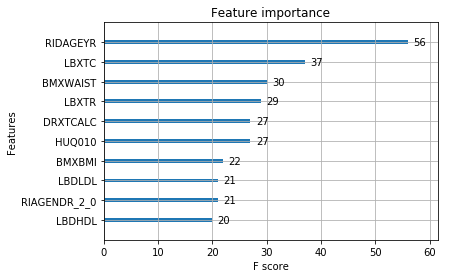

In [183]:
plot_importance(xg_clf_r, max_num_features = 10)

### Upsampling: SMOTE

#### GridSearch

In [184]:
#xg_class_u = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [185]:
#cv_xgu = GridSearchCV(estimator=xg_class_u, param_grid=params, scoring='f1', verbose=2, cv=3)

In [186]:
#cv_xgu.fit(X_sm, y_sm)

In [187]:
#cv_xgu.best_params_
# {'colsample_bytree': 0.6,
#  'learning_rate': 0.1,
#  'max_depth': 6,
#  'n_estimators': 100,
#  'scale_pos_weight': 10,
#  'subsample': 1.0}

In [188]:
#cv_xgu.best_score_
#0.9503387534700787

#### Best Parameter

In [189]:
#cv_xgu.best_estimator_

In [190]:
xg_clf_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [191]:
xg_clf_u.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [192]:
pred_xgu = xg_clf_u.predict(X_test)

#### Evaluation

In [193]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgu, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2675,176,2851
1,54,52,106
All,2729,228,2957


In [194]:
uxg_output = '{} \n Accuracy: {}'
uxg = uxg_output.format(classification_report(y_true, pred_xgu, labels=[0,1]), accuracy_score(y_true, pred_xgu))
print(uxg)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2851
           1       0.23      0.49      0.31       106

   micro avg       0.92      0.92      0.92      2957
   macro avg       0.60      0.71      0.64      2957
weighted avg       0.95      0.92      0.94      2957
 
 Accuracy: 0.9222184646601285


##### Compare with Random Forest

In [195]:
print(u)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2851
           1       0.22      0.14      0.17       106

   micro avg       0.95      0.95      0.95      2957
   macro avg       0.60      0.56      0.57      2957
weighted avg       0.94      0.95      0.95      2957
 
 Accuracy: 0.951640175853906


#### Feature Importance for XGBoost 

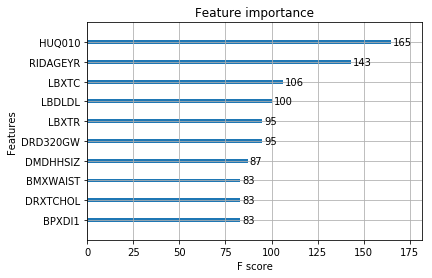

In [196]:
plot_importance(xg_clf_u, max_num_features = 10)

### Downsampling: TomekLinks

#### GridSearch

In [197]:
#xg_class_d = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [198]:
#cv_xgd = GridSearchCV(estimator=xg_class_d, param_grid=params, scoring='f1', verbose=2, cv=3)

In [199]:
#cv_xgd.fit(X_tl, y_tl)

In [200]:
#cv_xgd.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 3,
#  'n_estimators': 100,
#  'scale_pos_weight': 10,
#  'subsample': 1.0}

In [201]:
#cv_xgd.best_score_
#0.31772765549807247

#### Best Parameter

In [202]:
#cv_xgd.best_estimator_

In [203]:
xg_clf_d = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [204]:
xg_clf_d.fit(X_tl, y_tl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [205]:
pred_xgd = xg_clf_d.predict(X_test)

#### Evaluation

In [206]:
#Creating a confusion matrix 
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgd, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2601,250,2851
1,39,67,106
All,2640,317,2957


In [207]:
dxg_output = '{} \n Accuracy: {}'
dxg = dxg_output.format(classification_report(y_true, pred_xgd, labels=[0,1]), accuracy_score(y_true, pred_xgd))
print(dxg)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2851
           1       0.21      0.63      0.32       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.60      0.77      0.63      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.9022658099425093


##### Compare with Random Forest

In [208]:
print(d)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2851
           1       0.20      0.61      0.30       106

   micro avg       0.90      0.90      0.90      2957
   macro avg       0.59      0.76      0.62      2957
weighted avg       0.96      0.90      0.92      2957
 
 Accuracy: 0.8968549205275618


#### Feature Importance for XGBoost 

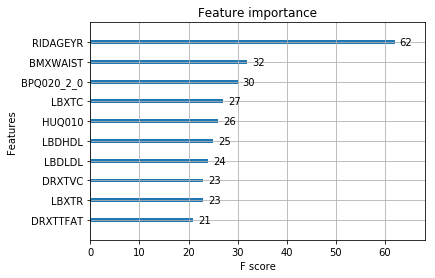

In [209]:
plot_importance(xg_clf_d, max_num_features = 10)

# Important Features: Risk Factors

### Feature Selection: Chi-Square

In [210]:
chi2_fi = featureScores.nlargest(10,'Score')
chi2_fi = chi2_fi.rename(columns={'Specs': 'Label', 'Score': 'Feature_Importance'})
chi2_fi

,Label,Feature_Importance
25,DRXTKCAL,18393.128558
16,DRDTSODI,18129.673796
15,DRD320GW,7229.300245
27,DRXTPHOS,4817.918001
55,RIDAGEYR,4764.357557
19,DRXTCALC,4104.748881
20,DRXTCARB,2485.882979
48,LBDLDL,1801.150440
50,LBXTR,1357.605734
31,DRXTVARE,1269.629491


### Random Forest

#### Regular:

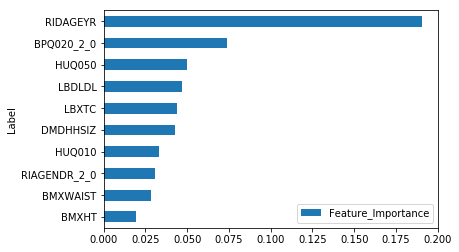

In [211]:
ax_r.figure

In [212]:
rfr_fi = rf_oo_r.copy()
rfr_fi

,Feature_Importance,Label
55,0.190796,RIDAGEYR
5,0.073754,BPQ020_2_0
44,0.050082,HUQ050
48,0.046669,LBDLDL
49,0.043974,LBXTC
13,0.042925,DMDHHSIZ
39,0.033153,HUQ010
54,0.030623,RIAGENDR_2_0
3,0.028314,BMXWAIST
2,0.019526,BMXHT


#### Upsample:

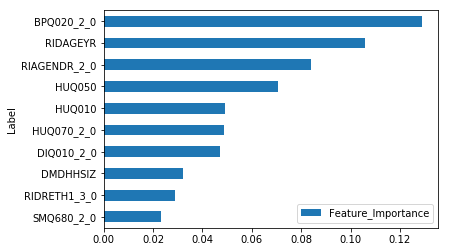

In [213]:
ax_u.figure

In [214]:
rfu_fi = rf_oo_u.copy()
rfu_fi

,Feature_Importance,Label
5,0.129128,BPQ020_2_0
55,0.105957,RIDAGEYR
54,0.083911,RIAGENDR_2_0
44,0.070807,HUQ050
39,0.049063,HUQ010
45,0.048872,HUQ070_2_0
9,0.047268,DIQ010_2_0
13,0.032075,DMDHHSIZ
57,0.028794,RIDRETH1_3_0
61,0.023265,SMQ680_2_0


#### Downsample:

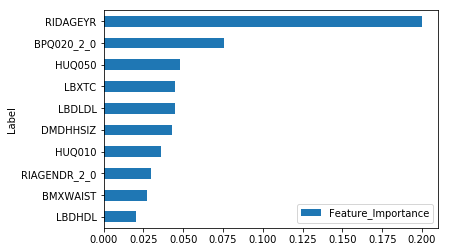

In [215]:
ax_d.figure

In [216]:
rfd_fi = rf_oo_d.copy()
rfd_fi

,Feature_Importance,Label
55,0.200252,RIDAGEYR
5,0.075350,BPQ020_2_0
44,0.048215,HUQ050
49,0.044737,LBXTC
48,0.044737,LBDLDL
13,0.043056,DMDHHSIZ
39,0.036250,HUQ010
54,0.029915,RIAGENDR_2_0
3,0.027251,BMXWAIST
47,0.020447,LBDHDL


### XGBoost

#### Regular

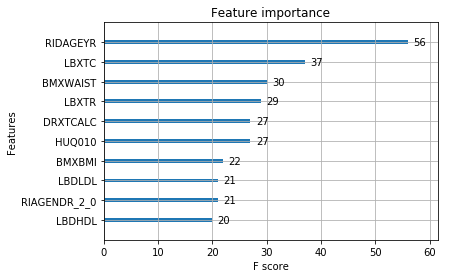

In [217]:
plot_importance(xg_clf_r, max_num_features = 10)

In [218]:
xgr_fs = xg_clf_r.get_booster().get_score(importance_type='weight')
xgr_fs = pd.DataFrame(xgr_fs.items(), columns = ['Label', 'Feature_Importance'])
xgr_fs = xgr_fs.nlargest(10, 'Feature_Importance')
xgr_fs

,Label,Feature_Importance
6,RIDAGEYR,56
1,LBXTC,37
10,BMXWAIST,30
17,LBXTR,29
11,HUQ010,27
34,DRXTCALC,27
31,BMXBMI,22
2,RIAGENDR_2_0,21
5,LBDLDL,21
0,BPQ020_2_0,20


In [219]:
xgr_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_r.feature_importances_, 'Label':X_train.columns})
xgr_fi = xgr_fi.nlargest(10,'Feature_Importance')
xgr_fi

,Feature_Importance,Label
55,0.117677,RIDAGEYR
5,0.105191,BPQ020_2_0
54,0.041489,RIAGENDR_2_0
44,0.039018,HUQ050
48,0.036841,LBDLDL
13,0.036018,DMDHHSIZ
49,0.033130,LBXTC
45,0.030812,HUQ070_2_0
39,0.030377,HUQ010
57,0.027757,RIDRETH1_3_0


#### Upsample:

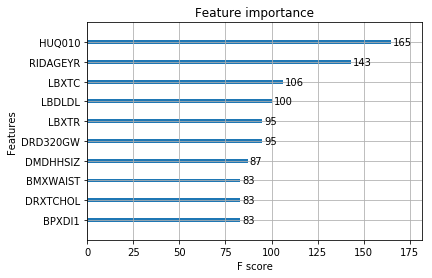

In [220]:
plot_importance(xg_clf_u, max_num_features = 10)

In [221]:
xgu_fs = xg_clf_u.get_booster().get_score(importance_type='weight')
xgu_fs = pd.DataFrame(xgu_fs.items(), columns = ['Label', 'Feature_Importance'])
xgu_fs = xgu_fs.nlargest(10, 'Feature_Importance')
xgu_fs

,Label,Feature_Importance
7,HUQ010,165
25,RIDAGEYR,143
17,LBXTC,106
8,LBDLDL,100
14,DRD320GW,95
30,LBXTR,95
10,DMDHHSIZ,87
0,BPQ020_2_0,83
1,RIAGENDR_2_0,83
11,BPXDI1,83


In [222]:
xgu_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_u.feature_importances_, 'Label':X_sm.columns})
xgu_fi = xgu_fi.nlargest(10,'Feature_Importance')
xgu_fi

,Feature_Importance,Label
5,0.134533,BPQ020_2_0
55,0.089887,RIDAGEYR
54,0.069060,RIAGENDR_2_0
44,0.066118,HUQ050
38,0.041604,HID010_2_0
11,0.033625,DMDBORN4_2_0
45,0.031785,HUQ070_2_0
57,0.027664,RIDRETH1_3_0
58,0.027625,RIDRETH1_4_0
52,0.026786,PAQ650_2_0


#### Downsample:

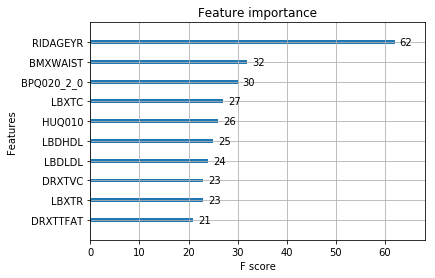

In [223]:
plot_importance(xg_clf_d, max_num_features = 10)

In [224]:
xgd_fs = xg_clf_d.get_booster().get_score(importance_type='weight')
xgd_fs = pd.DataFrame(xgd_fs.items(), columns = ['Label', 'Feature_Importance'])
xgd_fs = xgd_fs.nlargest(10, 'Feature_Importance')
xgd_fs

,Label,Feature_Importance
0,RIDAGEYR,62
6,BMXWAIST,32
1,BPQ020_2_0,30
2,LBXTC,27
8,HUQ010,26
16,LBDHDL,25
14,LBDLDL,24
11,LBXTR,23
36,DRXTVC,23
9,DRXTTFAT,21


In [225]:
xgd_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_d.feature_importances_, 'Label':X_tl.columns})
xgd_fi = xgd_fi.nlargest(10,'Feature_Importance')
xgd_fi

,Feature_Importance,Label
55,0.147310,RIDAGEYR
49,0.064830,LBXTC
5,0.048294,BPQ020_2_0
44,0.045131,HUQ050
54,0.039352,RIAGENDR_2_0
45,0.037312,HUQ070_2_0
39,0.032644,HUQ010
57,0.026315,RIDRETH1_3_0
48,0.026292,LBDLDL
58,0.021691,RIDRETH1_4_0


# Rankings:

Weights for each ranking:

In [239]:
wts = {'chi2_fi': 0.025, 'rf_fi': .15, 'xg_fs': .10, 'xg_fi': .075}

In [240]:
#Suffix names to join on
jl = ['chi2_fi', 'rfr_fi', 'rfu_fi', 'rfd_fi', 'xgr_fs', 'xgu_fs', 'xgd_fs', 'xgr_fi', 'xgu_fi', 'xgd_fi']

In [241]:
#Outer join function
def outerjoin_df(dfs_list):
    n = 1
    df_join = dfs_list[0]
    for d in dfs_list[1:]:
        df_join = df_join.merge(d, how='outer', suffixes=('_'+jl[n-1], '_'+jl[n]), on=['Label'])
        n = n+1
    return df_join

In [242]:
#List of top 10 feature importances
join_list = [chi2_fi, rfr_fi, rfu_fi, rfd_fi, xgr_fs, xgu_fs, xgd_fs, xgr_fi, xgu_fi, xgd_fi]

In [243]:
#Joined list of top 10 feature importances
joined = outerjoin_df(join_list)

In [244]:
joined.head()

,Label,Feature_Importance_chi2_fi,Feature_Importance_rfr_fi,Feature_Importance_rfu_fi,Feature_Importance_rfd_fi,Feature_Importance_xgr_fs,Feature_Importance_xgu_fs,Feature_Importance_xgd_fs,Feature_Importance_xgr_fi,Feature_Importance_xgu_fi,Feature_Importance_xgd_fi
0,DRXTKCAL,18393.128558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRDTSODI,18129.673796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DRD320GW,7229.300245,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,NaN
3,DRXTPHOS,4817.918001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RIDAGEYR,4764.357557,0.190796,0.105957,0.200252,56.0,143.0,62.0,0.117677,0.089887,0.14731


In [245]:
#Get the percentage importance of top ten for each feature importance
pct_list = pd.DataFrame()
pct_list['Label'] = joined['Label']
for i, j in enumerate(jl):
    pct_list[j] = joined['Feature_Importance_'+jl[i]]/joined['Feature_Importance_'+jl[i]].sum()   

In [246]:
#Fill in NaNs with 0
pct_list = pct_list.fillna(0)
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi
0,DRXTKCAL,0.285814,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,DRDTSODI,0.281721,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,DRD320GW,0.112338,0.00000,0.000000,0.00000,0.000000,0.091346,0.000000,0.000000,0.000000,0.000000
3,DRXTPHOS,0.074867,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,RIDAGEYR,0.074034,0.34082,0.171136,0.35119,0.193103,0.137500,0.211604,0.236152,0.163822,0.301143


### Column for weighted overall risk factor importance ranking

In [247]:
#Weighted overall ranking
pct_list['Importance'] = pct_list[jl[0]] * wts['chi2_fi'] + pct_list[jl[1]] * wts['rf_fi'] + pct_list[jl[2]] * wts['rf_fi'] + pct_list[jl[3]] * wts['rf_fi'] + pct_list[jl[4]] * wts['xg_fs'] + pct_list[jl[5]] * wts['xg_fs'] + pct_list[jl[6]] * wts['xg_fs'] + pct_list[jl[7]] * wts['xg_fi'] + pct_list[jl[8]] * wts['xg_fi'] + pct_list[jl[9]] * wts['xg_fi']

In [248]:
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi,Importance
0,DRXTKCAL,0.285814,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007145
1,DRDTSODI,0.281721,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007043
2,DRD320GW,0.112338,0.00000,0.000000,0.00000,0.000000,0.091346,0.000000,0.000000,0.000000,0.000000,0.011943
3,DRXTPHOS,0.074867,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001872
4,RIDAGEYR,0.074034,0.34082,0.171136,0.35119,0.193103,0.137500,0.211604,0.236152,0.163822,0.301143,0.238127


## Identified Top 10 Risk Factors:

In [249]:
Risk_Factors = pct_list[['Label','Importance']].copy()

In [250]:
Risk_Factors_10 = Risk_Factors.nlargest(10, 'Importance')
Risk_Factors_10

,Label,Importance
4,RIDAGEYR,0.238127
10,BPQ020_2_0,0.137610
14,HUQ010,0.073932
15,RIAGENDR_2_0,0.073344
12,LBXTC,0.070643
11,HUQ050,0.065087
7,LBDLDL,0.059597
13,DMDHHSIZ,0.044385
16,BMXWAIST,0.036022
8,LBXTR,0.027512


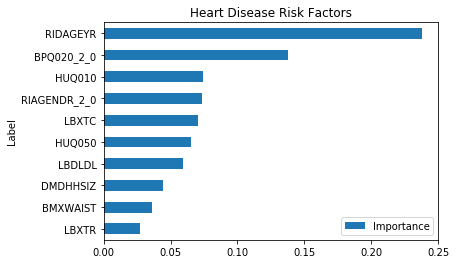

In [251]:
Risk_Factors_10 = Risk_Factors_10.sort_values(by=['Importance'])
Risk_Factors_Plot = Risk_Factors_10.plot.barh(y='Importance', x='Label', title='Heart Disease Risk Factors')